# Data Analysis

In [4]:
library(readxl)
library(dplyr)
library(chron)
library(fitdistrplus)
options(warn = -1)

ERROR: Error in library(readxl): there is no package called 'readxl'


## 3. Graphical Analysis of discharge for June 1, June 15, and June 30

#### Import data and Overview of data

In [4]:
data <- read_excel('data.xlsx')

In [6]:
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	124741 obs. of  4 variables:
 $ Date      : POSIXct, format: "2009-08-07" "2009-08-07" ...
 $ Time      : chr  "00:15:00" "00:30:00" "00:45:00" "01:00:00" ...
 $ DischargeM: num  210 210 215 215 219 219 224 224 224 229 ...
 $ DischargeW: num  365 365 371 371 378 384 384 384 390 390 ...


#### Convert Date and Time to Date and Time format

In [134]:
data$Date <- as.Date(data$Date)

data$Time <- times(data$Time)

head(data)

Date,Time,DischargeM,DischargeW
2009-08-07,00:15:00,210,365
2009-08-07,00:30:00,210,365
2009-08-07,00:45:00,215,371
2009-08-07,01:00:00,215,371
2009-08-07,01:15:00,219,378
2009-08-07,01:30:00,219,384


#### Subset only necessary data

In [133]:
data_0601 = subset(data, format(Date, "%m-%d") == "06-01")

data_0615 = subset(data, format(Date, "%m-%d") == "06-15")

data_0630 = subset(data, format(Date, "%m-%d") == "06-30")

### (3a) Density histogram

#### Mudd Creek

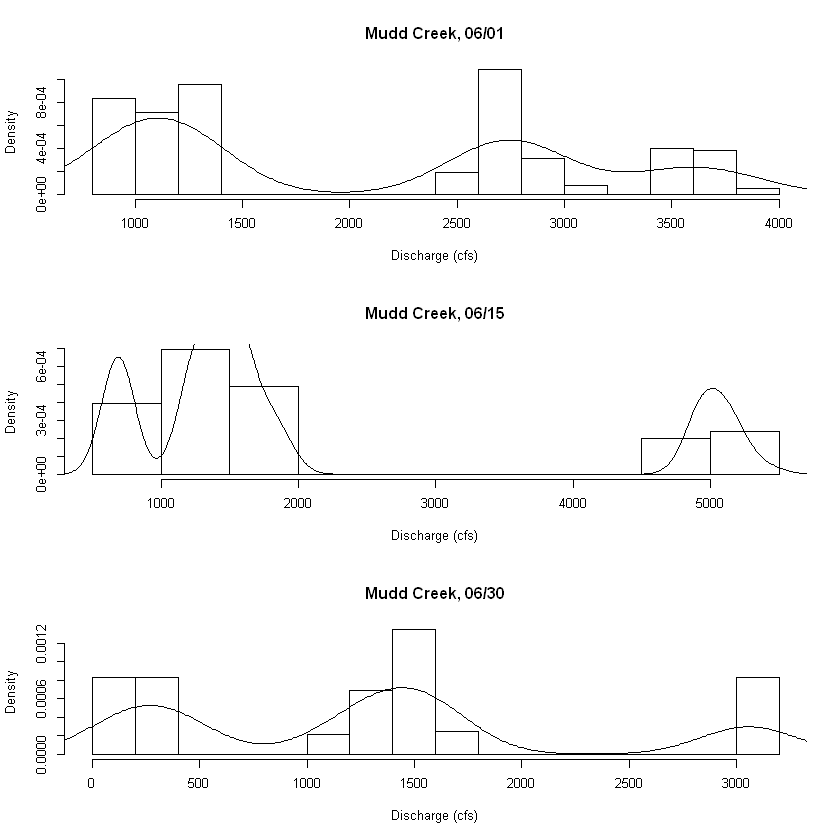

In [135]:
par(mfrow=c(3,1))

hist(data_0601$DischargeM, main = "Mudd Creek, 06/01", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0601$DischargeM), add=T)

hist(data_0615$DischargeM, main = "Mudd Creek, 06/15", xlab = "Discharge (cfs)", prob = T)
lines(density(data_0615$DischargeM), add=T)

hist(data_0630$DischargeM, main = "Mudd Creek, 06/30", xlab = "Discharge (cfs)", prob = T)
lines(density(data_0630$DischargeM), add=T)

In [91]:
'June 1'
summary(data_0601$DischargeM)
'June 15'
summary(data_0615$DischargeM)
'June 30'
summary(data_0630$DischargeM)

[1] "June 1"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "June 15"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "June 30"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

#### Mudd Creek:
##### - On average, discharge during early- to mid-June is bigger than during late-June
##### - There are a lot of gaps in the data, distributed unevenly across these 3 dates
##### - For June 15, Mean discharge is significantly bigger than Median discharge

#### Wise River

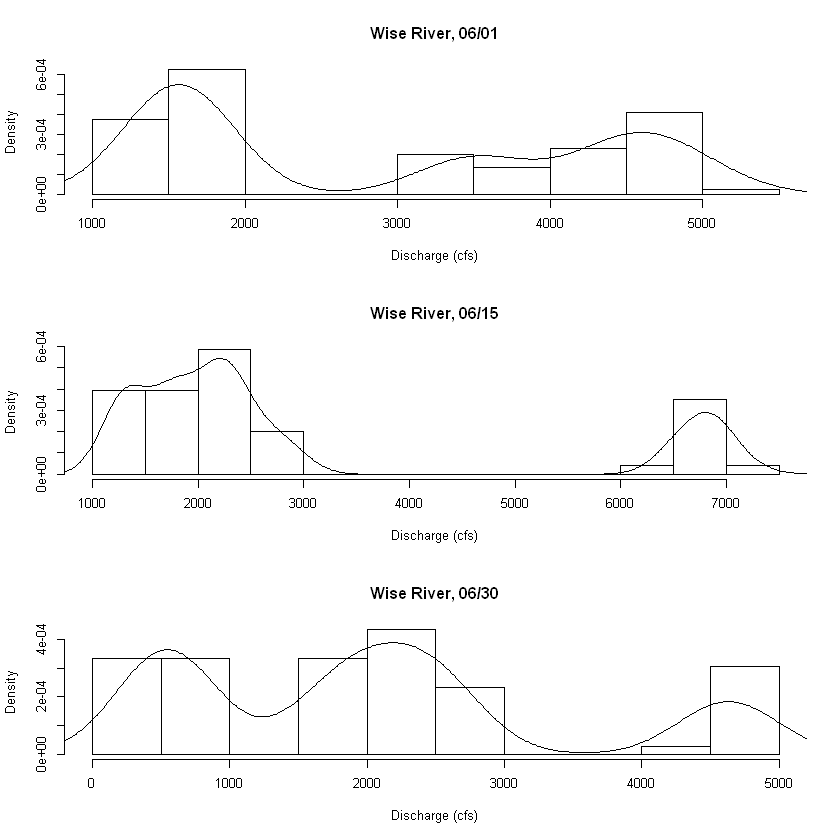

In [131]:
par(mfrow=c(3,1))

hist(data_0601$DischargeW, main = "Wise River, 06/01", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0601$DischargeW), add=T)

hist(data_0615$DischargeW, main = "Wise River, 06/15", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0615$DischargeW), add=T)

hist(data_0630$DischargeW, main = "Wise River, 06/30", xlab = "Discharge (cfs)", prob=T)
lines(density(data_0630$DischargeW), add=T)

In [92]:
'June 1'
summary(data_0601$DischargeW)
'June 15'
summary(data_0615$DischargeW)
'June 30'
summary(data_0630$DischargeW)

[1] "June 1"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1410    1610    2505    2904    4480    5060 

[1] "June 15"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1290    1745    2220    3003    2855    7330 

[1] "June 30"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    429     654    1935    2035    2560    4790 

#### Wise River
##### - On average, discharge during early- to mid-June is bigger than during late-June
##### - There are a lot of gaps in the data, distributed unevenly across these 3 dates
##### - For June 15, Mean discharge is significantly bigger than Median discharge

### (3b) Outlier boxplot

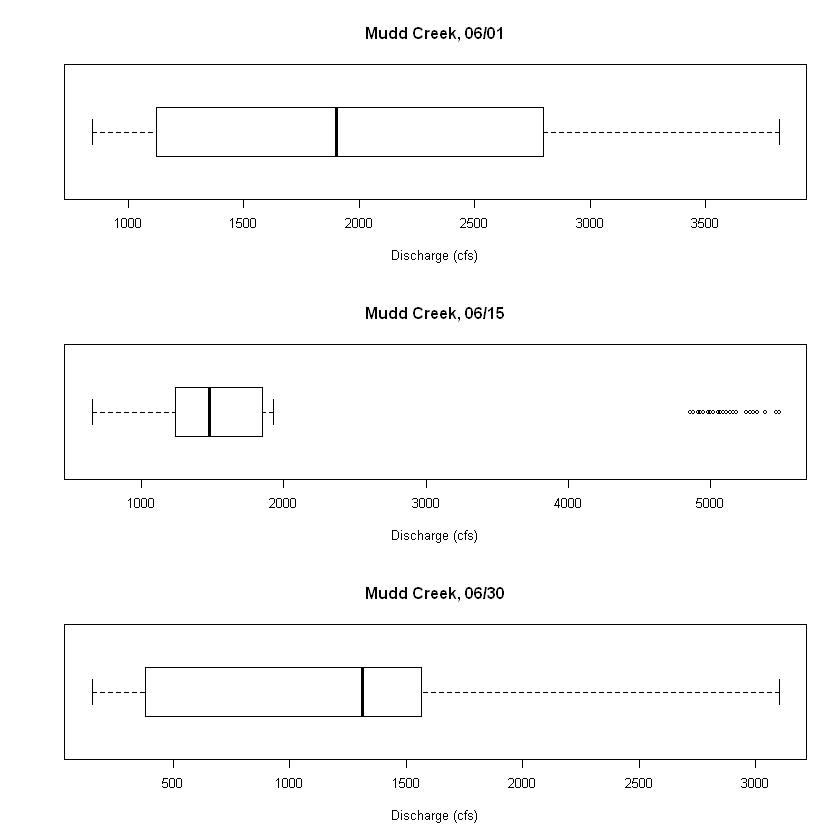

In [136]:
par(mfrow=c(3,1))

boxplot(data_0601$DischargeM, horizontal = T, main = "Mudd Creek, 06/01", xlab = "Discharge (cfs)")

boxplot(data_0615$DischargeM, horizontal = T, main = "Mudd Creek, 06/15", xlab = "Discharge (cfs)")

boxplot(data_0630$DischargeM, horizontal = T, main = "Mudd Creek, 06/30", xlab = "Discharge (cfs)")

#### Mudd Creek
##### There are tens of extreme outliers on June 15. This is why the Mean is significantly bigger than the Median

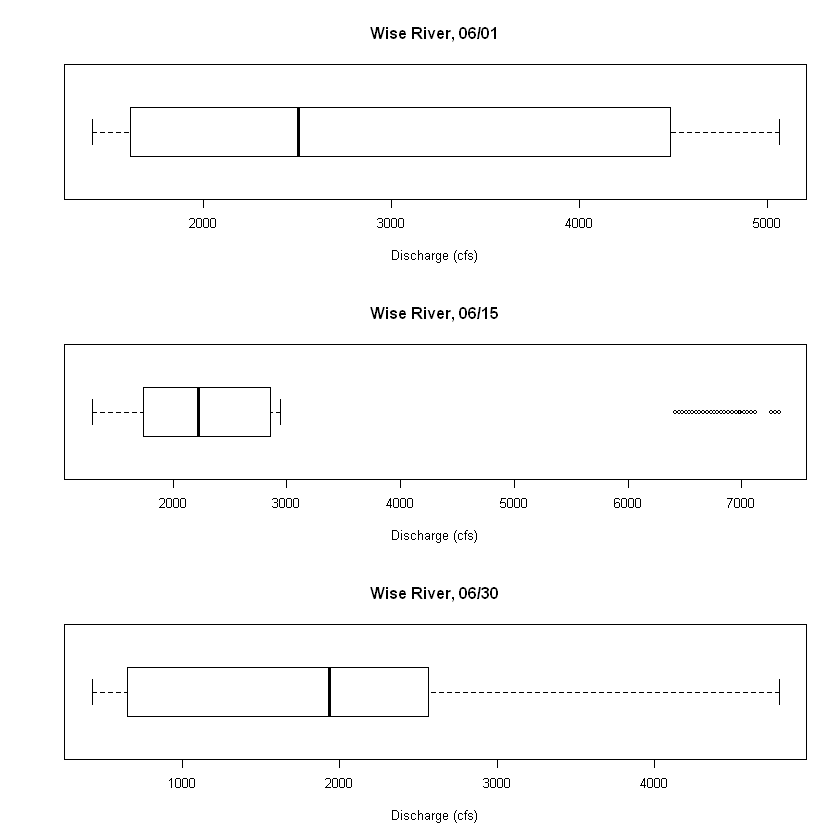

In [137]:
par(mfrow=c(3,1))

boxplot(data_0601$DischargeW, horizontal = T, main = "Wise River, 06/01", xlab = "Discharge (cfs)")

boxplot(data_0615$DischargeW, horizontal = T, main = "Wise River, 06/15", xlab = "Discharge (cfs)")

boxplot(data_0630$DischargeW, horizontal = T, main = "Wise River, 06/30", xlab = "Discharge (cfs)")

#### Wise River
##### There are tens of extreme outliers on June 15. This is why the Mean is significantly bigger than the Median

### (3c) Normal plot

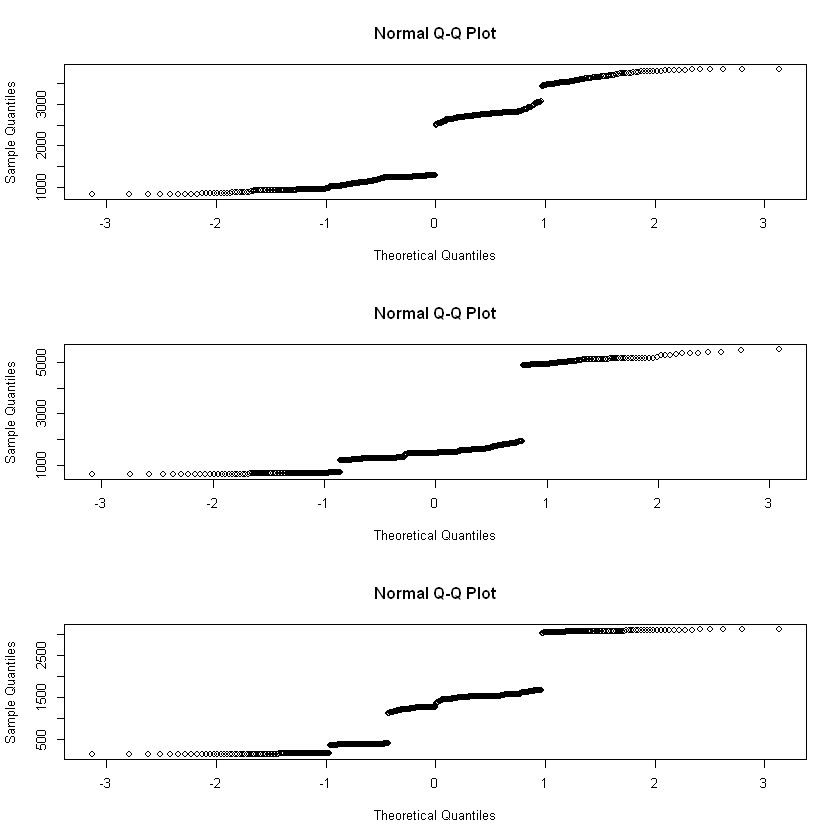

In [138]:
par(mfrow = c(3,1))

qqnorm(data_0601$DischargeM)

qqnorm(data_0615$DischargeM)

qqnorm(data_0630$DischargeM)

#### Mudd Creek
##### - Does not pass fat pencil test => NOT normal.

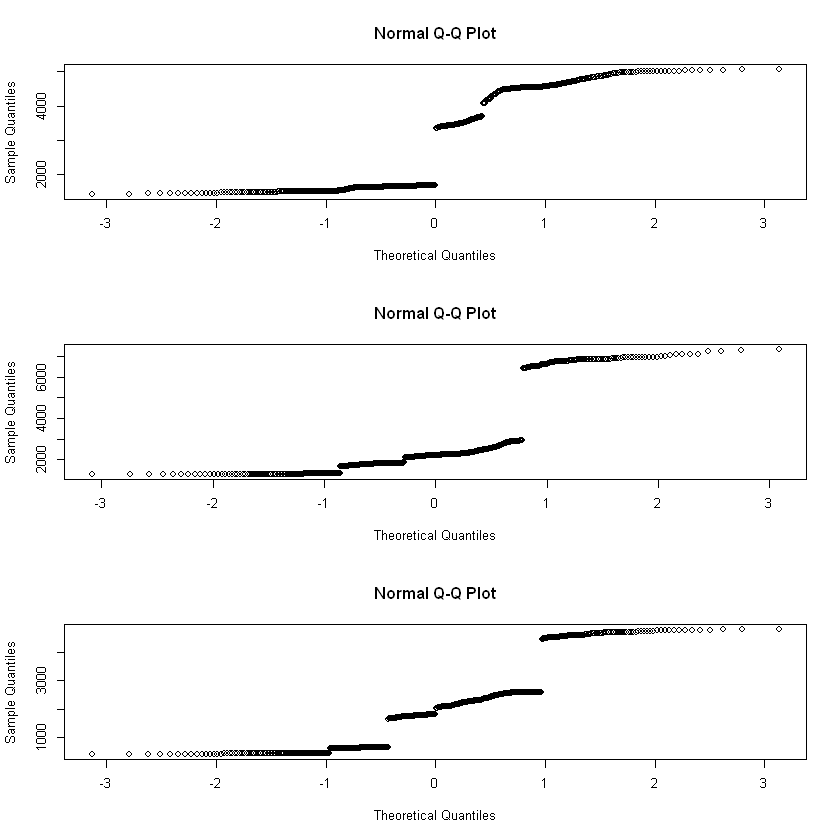

In [139]:
par(mfrow = c(3,1))

qqnorm(data_0601$DischargeW)

qqnorm(data_0615$DischargeW)

qqnorm(data_0630$DischargeW)

#### Wise River
##### Does not pass fat pencil test => NOT normal.

## 4. Basic summary statistics

### Mudd Creek

#### June 1

In [103]:
'6-number summary'
summary(data_0601$DischargeM)
'Trimmed mean'
print(mean(data_0601$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0601$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0601$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "Trimmed mean"

[1] 2069.095


[1] "Standard Deviation"

[1] 1098.128


[1] "Inter-Quartile range"

[1] 1680


#### June 15

In [104]:
'6-number summary'
summary(data_0615$DischargeM)
'Trimmed mean'
print(mean(data_0615$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0615$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0615$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "Trimmed mean"

[1] 2097.706


[1] "Standard Deviation"

[1] 1713.836


[1] "Inter-Quartile range"

[1] 610


#### June 30

In [101]:
'6-number summary'
summary(data_0630$DischargeM)
'Trimmed mean'
print(mean(data_0630$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0630$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0630$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

[1] "Trimmed mean"

[1] 1311.509


[1] "Standard Deviation"

[1] 1046.446


[1] "Inter-Quartile range"

[1] 1183.5


### Wise River

### June 1

In [106]:
'6-number summary'
summary(data_0601$DischargeM)
'Trimmed mean'
print(mean(data_0601$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0601$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0601$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    843    1120    1900    2069    2800    3820 

[1] "Trimmed mean"

[1] 2069.095


[1] "Standard Deviation"

[1] 1098.128


[1] "Inter-Quartile range"

[1] 1680


### June 15

In [107]:
'6-number summary'
summary(data_0615$DischargeM)
'Trimmed mean'
print(mean(data_0615$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0615$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0615$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    657    1240    1480    2098    1850    5480 

[1] "Trimmed mean"

[1] 2097.706


[1] "Standard Deviation"

[1] 1713.836


[1] "Inter-Quartile range"

[1] 610


### June 30

In [108]:
'6-number summary'
summary(data_0630$DischargeM)
'Trimmed mean'
print(mean(data_0630$DischargeM, trimmed = 0.1))
'Standard Deviation'
print(sd(summary(data_0630$DischargeM)))
'Inter-Quartile range'
print(IQR(data_0630$DischargeM))

[1] "6-number summary"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     379    1310    1312    1562    3100 

[1] "Trimmed mean"

[1] 1311.509


[1] "Standard Deviation"

[1] 1046.446


[1] "Inter-Quartile range"

[1] 1183.5


## 5 & 6. Density histogram and potential probability model for Wise River's discharge on 04/10/2017

### Subset necessary data and Overview of data

In [109]:
data_p5 = subset(data, Date == "2017-04-10")

In [112]:
str(data_p5)

Classes 'tbl_df', 'tbl' and 'data.frame':	96 obs. of  4 variables:
 $ Date      : Date, format: "2017-04-10" "2017-04-10" ...
 $ Time      : 'times' num  00:00:00 00:15:00 00:30:00 00:45:00 01:00:00 ...
  ..- attr(*, "format")= chr "h:m:s"
 $ DischargeM: num  886 886 886 886 875 875 875 875 875 864 ...
 $ DischargeW: num  1320 1320 1320 1320 1310 1310 1310 1310 1300 1310 ...


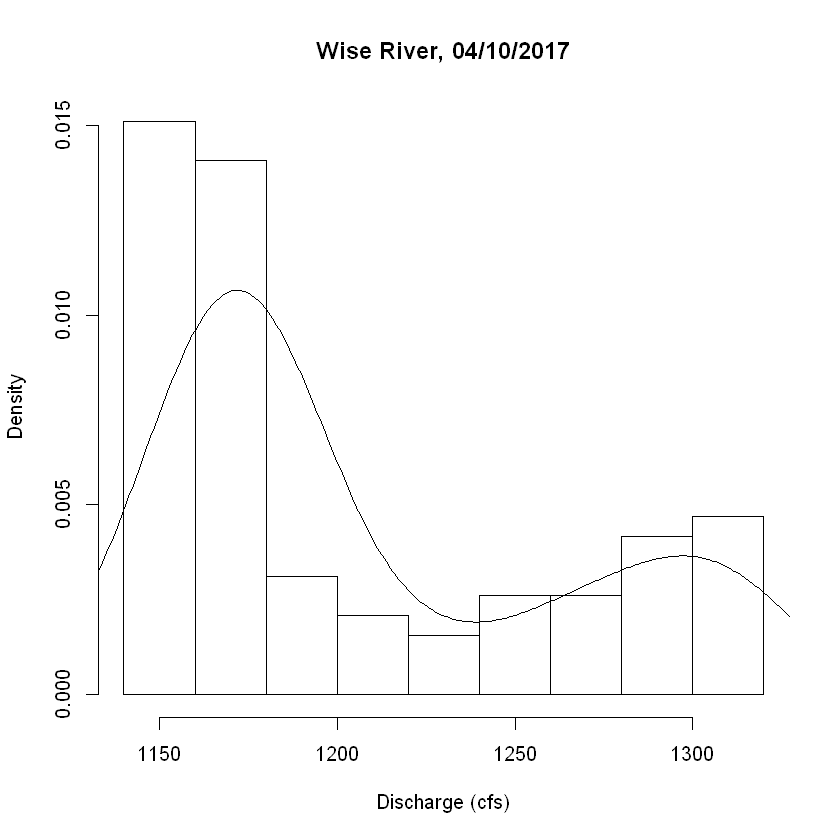

In [120]:
hist(data_p5$DischargeW, prob = T, main = 'Wise River, 04/10/2017', xlab = 'Discharge (cfs)')
lines(density(data_p5$DischargeW), add=T)

#### => A potential probability model that might be used to model Wise River's discharge for 04/10/2017 is the Bimodal Distribution.